<a href="https://colab.research.google.com/github/thaiscardosoms/rede-neural-trabalho/blob/master/Iris_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 10)                50        
_________________________________________________________________
dense_177 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_178 (Dense)            (None, 3)                 27        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
Train on 119 samples, validate on 30 samples
Epoch 1/30
119/119 [==============================] - 1s 10ms/sample - loss: 1.0148 - acc: 0.5294 - val_loss: 0.6207 - val_acc: 0.6667
Epoch 2/30
119/119 [==============================] - 0s 2ms/sample - loss: 0.5379 - acc: 0.7143 - val_loss: 0.3838 - val_acc: 0.8333
Epoch 3/30
119/119 [==============================] - 0s 2ms/sample - loss: 0.4200 - acc: 0.76

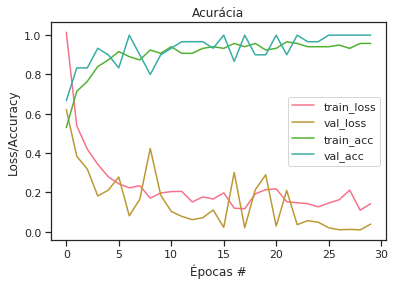

In [129]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.regularizers import l1
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

nomes=['sepal_length','sepal_width','petal_length','petal_width','species']

#Carregar o dataset
df_iris = pd.read_csv('https://raw.githubusercontent.com/thaiscardosoms/rede-neural-trabalho/master/iris.data.csv',names=nomes,header=0)

#df_iris

#Dividindo o dataset em treinamento e teste
X = df_iris.iloc[:,0:4].values
y = df_iris.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


# Definição da arquitetura do modelo
model = Sequential()


#camada de ativação
model.add(Dense(10, input_dim=4,activation='relu'))

#camada oculta
model.add(Dense(8, activation='tanh'))

#camada de saida
model.add(Dense(3, activation='softmax'))


# Fim - Definição da arquitetura do modelo

model.summary()
#build model


#choose optimizer and loss function
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(0.01), metrics=['accuracy'])

#train
batch_size = 1 #5 entradas
num_classes = 4 #quantidade de classes (De 0 a 4)
epochs = 30

H = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))




# Avaliação do modelo no conjunto de teste
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plotando 'loss' e 'accuracy' para os datasets 'train' e 'test'
plt.figure()
plt.plot(np.arange(0,epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), H.history["val_acc"], label="val_acc")
plt.title("Acurácia")
plt.xlabel("Épocas #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()